# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = r"C:\repos\Challenges-Work\Challenge-6\Resources"

# Read saved data
city_data_df = pd.read_csv(r"C:\repos\Challenges-Work\Challenge-6\Resources\cities.csv")

# Example use of API key
print(f"Your OpenWeatherMap API Key: {weather_api_key}")


Your OpenWeatherMap API Key: 0e0aa85e54e6d3e632ff64477eaa22ab


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
     
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]        
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]   
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | klyuchi
Processing Record 3 of Set 1 | islamorada
Processing Record 4 of Set 1 | itaguai
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | carrizo springs
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | qorveh
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | uttarkashi
Processing Record 18 of Set 1 | dunedin
Processing Record 19 of Set 1 | antalaha
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | alesund
Processing Record 22 of Set 1 | ust-nera
Processing Record 23 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,-0.15,94,99,8.09,RU,1727124693
1,klyuchi,52.2667,79.1667,7.21,59,1,3.81,RU,1727124695
2,islamorada,24.9243,-80.6278,28.91,75,1,6.96,US,1727124696
3,itaguai,-22.8522,-43.7753,24.79,78,40,4.12,BR,1727124697
4,badger,64.8000,-147.5333,9.52,59,75,5.14,US,1727124698


In [6]:
# Export the City_Data into a csv
import pandas as pd
import matplotlib.pyplot as plt

output_data_file = r"C:\repos\Challenges-Work\Challenge-6\Resources"

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read saved data
city_data_df = pd.read_csv(r"C:\repos\Challenges-Work\Challenge-6\Resources\cities.csv")

# Display sample data
city_data_df.head()


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

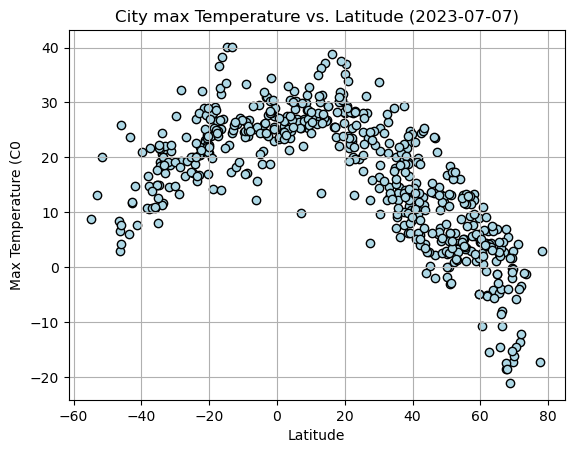

In [8]:
# Build scatter plot for latitude vs. temperature
x_values_lat = city_data_df['Lat']
y_values_max_temp = city_data_df['Max Temp']
plt.scatter(x_values_lat,y_values_max_temp,color=(0.678, 0.847, 0.902),edgecolors="black")

# Incorporate the other graph properties

plt.title('City max Temperature vs. Latitude (2023-07-07)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C0')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

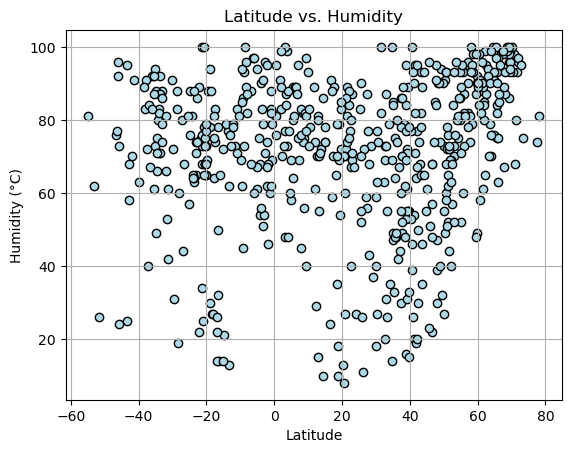

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read saved data
city_data_df = pd.read_csv(r"C:\repos\Challenges-Work\Challenge-6\Resources\cities.csv")

# Build the scatter plots for latitude vs. humidity
x_values_lat = city_data_df['Lat']
y_values_humidity = city_data_df['Humidity']
plt.scatter(x_values_lat, y_values_humidity, color=(0.678, 0.847, 0.902), edgecolors="black")

# Show the plot (optional)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (°C)")
plt.grid(True)
plt.show()

#### Latitude Vs. Cloudiness

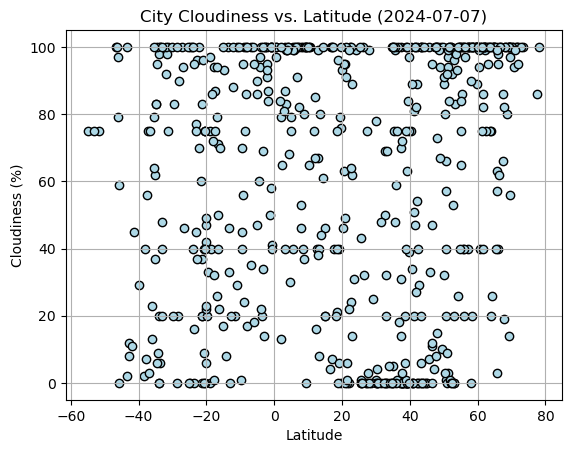

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values_lat = city_data_df['Lat']
y_values_cloudiness = city_data_df['Cloudiness']
plt.scatter(x_values_lat,y_values_cloudiness,color=(0.678, 0.847, 0.902),edgecolors="black")


# Incorporate the other graph properties
plt.title('City Cloudiness vs. Latitude (2024-07-07)')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

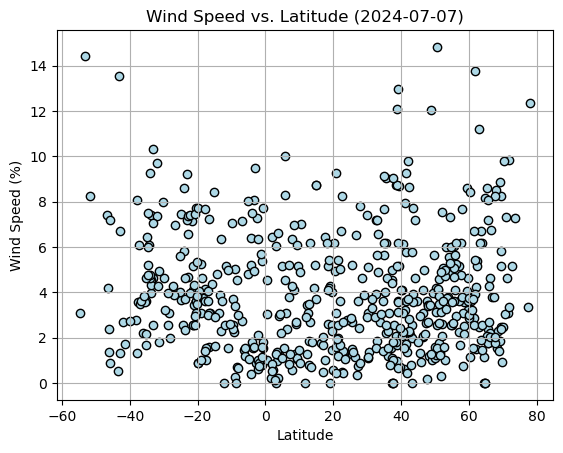

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values_lat = city_data_df['Lat']
y_values_wind_speed = city_data_df['Wind Speed']
plt.scatter(x_values_lat, y_values_wind_speed, color=(0.678, 0.847, 0.902), edgecolors="black")

# Incorporate the other graph properties
plt.title('Wind Speed vs. Latitude (2024-07-07)')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_label, y_label, x_annotate, y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")
    plt.title(f"{y_label} vs {x_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)  # Corrected this line
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7161472181434125


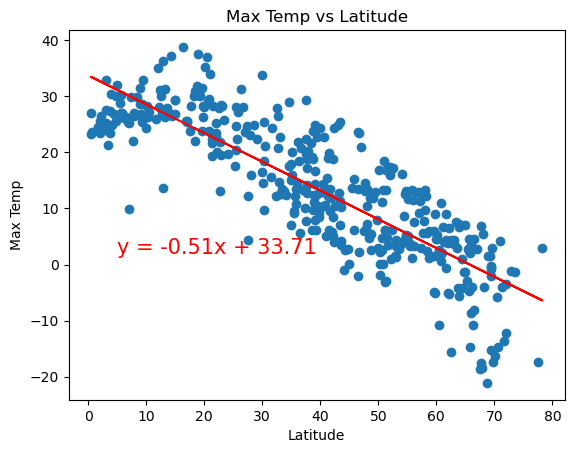

In [15]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', 5.0, 2.0)

The r^2-value is: 0.4121057168607252


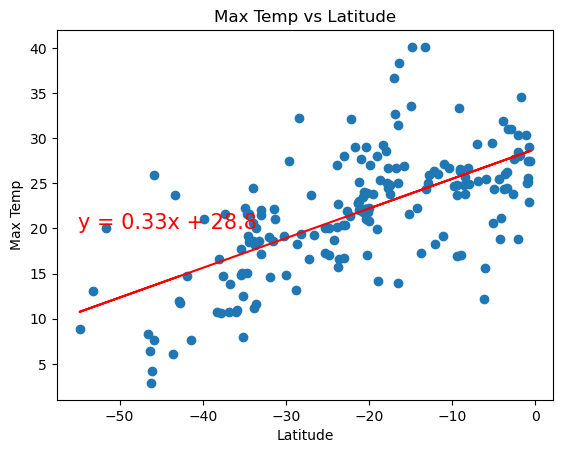

In [30]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', -55.0, 20.0)

**Discussion about the linear relationship:** there is a significant relationship between latitude and maximum temperature in the Southern Hemisphere, and what that might imply about climate patterns in that region.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.05689741545789608


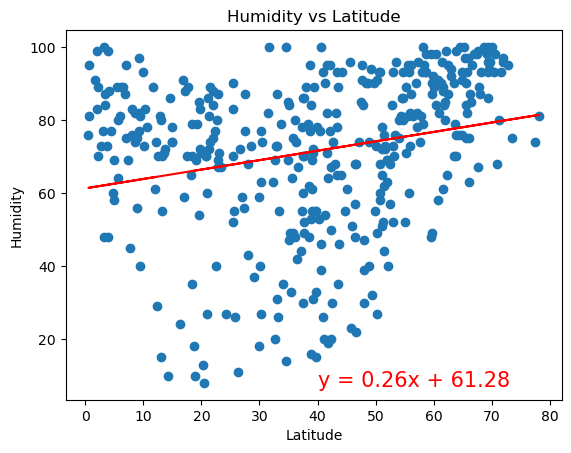

In [23]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 40.0, 7.0)

The r^2-value is: 0.0002808747046324618


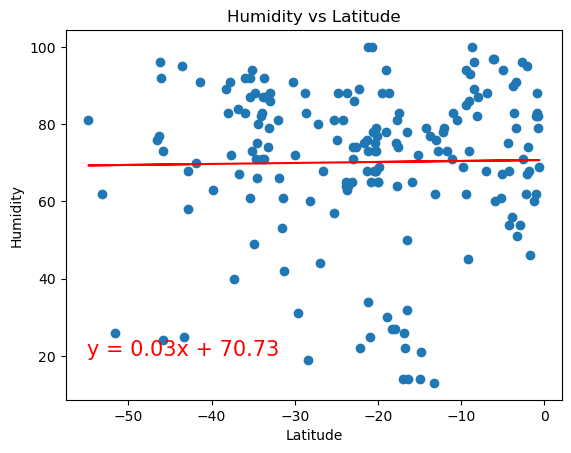

In [24]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', -55.0, 20.0)

**Discussion about the linear relationship:** There is little to no correlation between humidity and latitude, with r-squared values for both the northern and southern hemispheres being less than 2%.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.024026517125811043


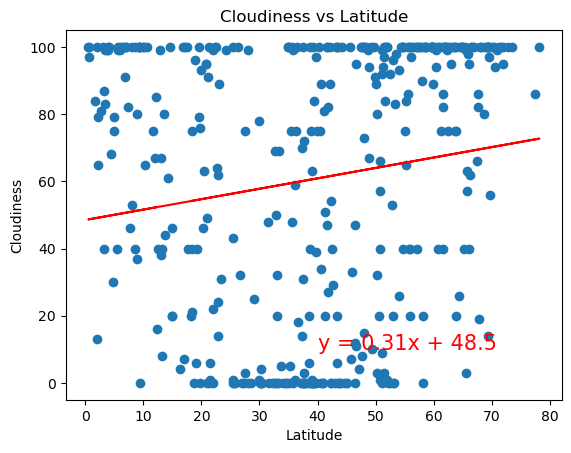

In [25]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 40.0, 10.0)


The r^2-value is: 0.020567354299943663


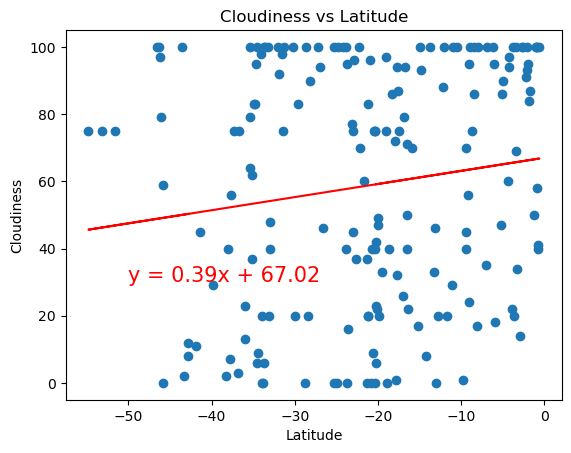

In [26]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', -50.0, 30.0)

**Discussion about the linear relationship:** There is little to no correlation between cloudiness and latitude, as the R-squared values for both the northern and southern hemispheres are below 3%.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.030396762354449484


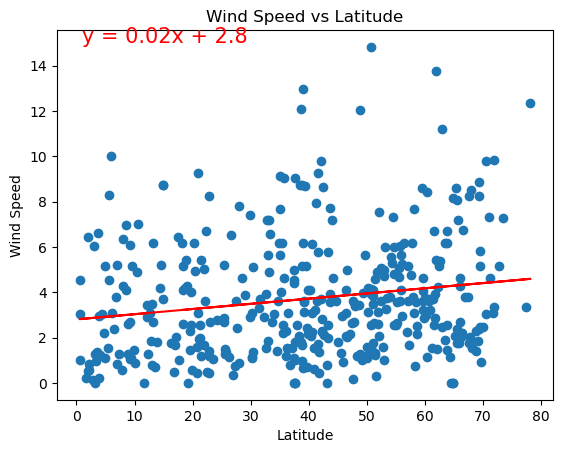

In [28]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 1.0, 15.0)

The r^2-value is: 0.06223904070051575


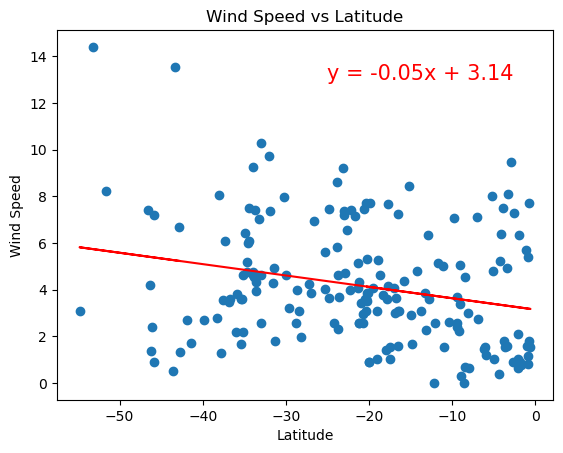

In [29]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', -25.0, 13.0)

**Discussion about the linear relationship:** There is almost no correlation between wind speed and latitude, with r-squared values below 5% for both the northern and southern hemispheres.